In [1]:
import resources.Get_Data as Get_Data
from resources.single_data.RF_AR import RF_AR
from resources.single_data.CART_AR import CART_AR
from resources.single_data.KNN_AR import KNN_AR
from resources.vectorised_data.MISO.ARX_repr.KNN_ARX import KNN_ARX
from resources.vectorised_data.MISO.ARX_repr.CART_ARX import CART_ARX
from resources.vectorised_data.MISO.ARX_repr.RF_ARX import RF_ARX
import matplotlib.pyplot as plt
import pandas as pd
import julia
from julia import Pkg
from julia import Main
import Get_Vectorised_Data
Pkg.add("DecisionTree")
Main.using("DecisionTree")
import numpy as np
from single_data.rolling_AR import AR_predict
%load_ext julia.magic

[*********************100%***********************]  2 of 2 completed
make_diff()
                 ^GSPC       ^IXIC
Date                              
2021-01-04  -55.420166 -189.830078
2021-01-05   26.210205  120.509766
2021-01-06   21.279785  -78.169922
2021-01-07   55.650146  326.690430
2021-01-08   20.889893  134.500000
...                ...         ...
2022-04-29 -155.569824 -536.890625
2022-05-02   23.449707  201.379883
2022-05-03   20.100098   27.740234
2022-05-04  124.689941  401.100586
2022-05-05 -153.299805 -647.168945

[338 rows x 2 columns]
Initializing Julia interpreter. This may take some time...


In [2]:
getter = Get_Data.Get_Data("^IXIC", start="2018-08-22", end="2019-10-30", interval="1d")
ixic_vec_norm = getter.make_diff()

make_diff()


In [3]:
cart_ar = CART_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

cart_ar.fit({
    "max_depth": 8,
    "min_samples_split": 2,
    "min_samples_leaf": 2,
})

209 209
{'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2}
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)
(99, 1) (99, 1)


forecast_raw


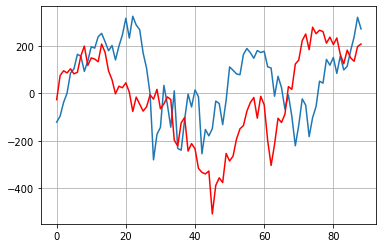

In [13]:
plt.plot(np.cumsum(cart_ar.data_test.values))
plt.plot(np.cumsum(cart_ar.forecast_raw()), c='r')
plt.grid()

In [5]:
rf_ar = RF_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

{'max_depth': 8, 'n_estimators': 18, 'min_samples_split': 2, 'min_samples_leaf': 2}
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) (69, 1)
(69,) 

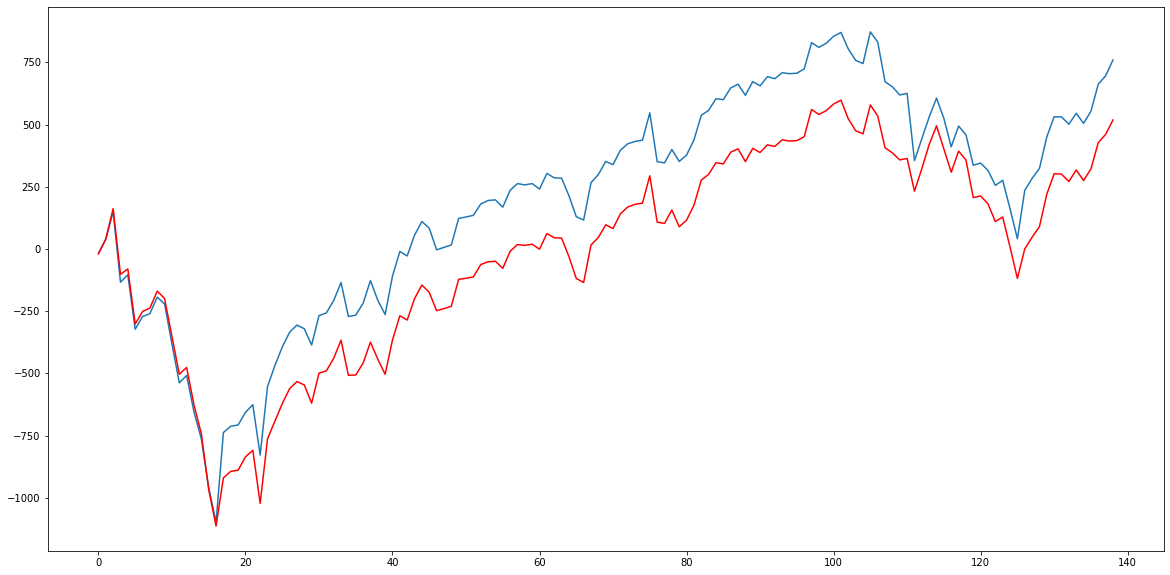

In [6]:
rf_ar.fit({
    "max_depth": 8,
    "n_estimators": 18,
    "min_samples_split": 2,
    "min_samples_leaf": 2
})

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(rf_ar.data[rf_ar.prog:].values))
plt.plot(np.cumsum(rf_ar.predictions), c='r')

forecast_raw
90 90
forecast_raw


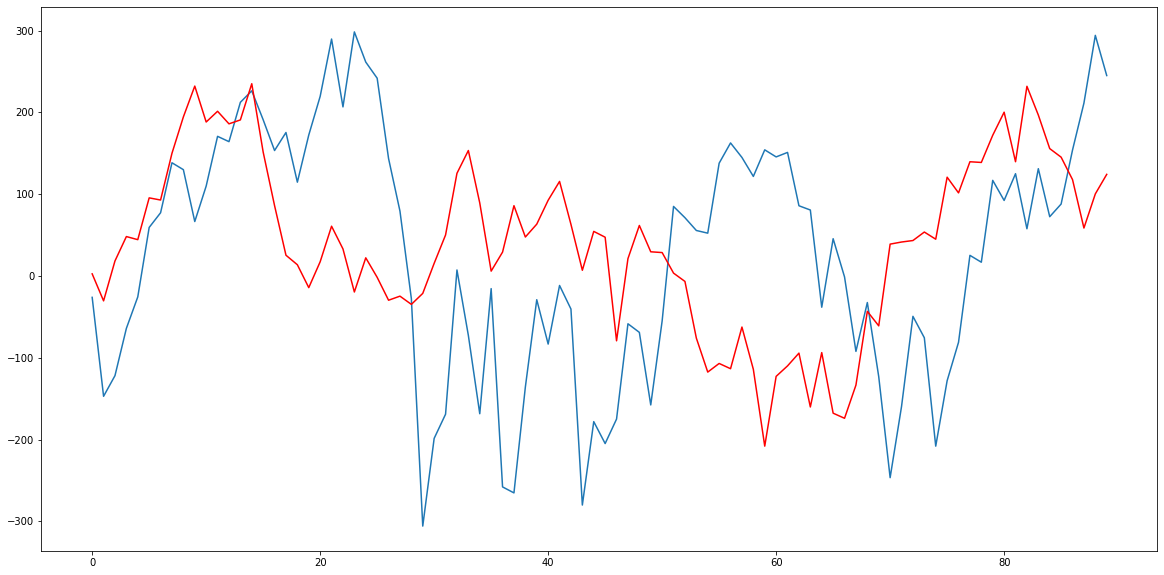

In [7]:
print(len(np.cumsum(rf_ar.data_test.values)), len(rf_ar.forecast_raw()))
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(rf_ar.data_test.values))
plt.plot(np.cumsum(rf_ar.forecast_raw()) , c='r')

In [8]:
knn_ar = KNN_AR(data=ixic_vec_norm, params={"lags": 1}, test_ratio=0.7)

{'k_neighbors': 19, 'weights': 'distance', 'p': 1}
fit


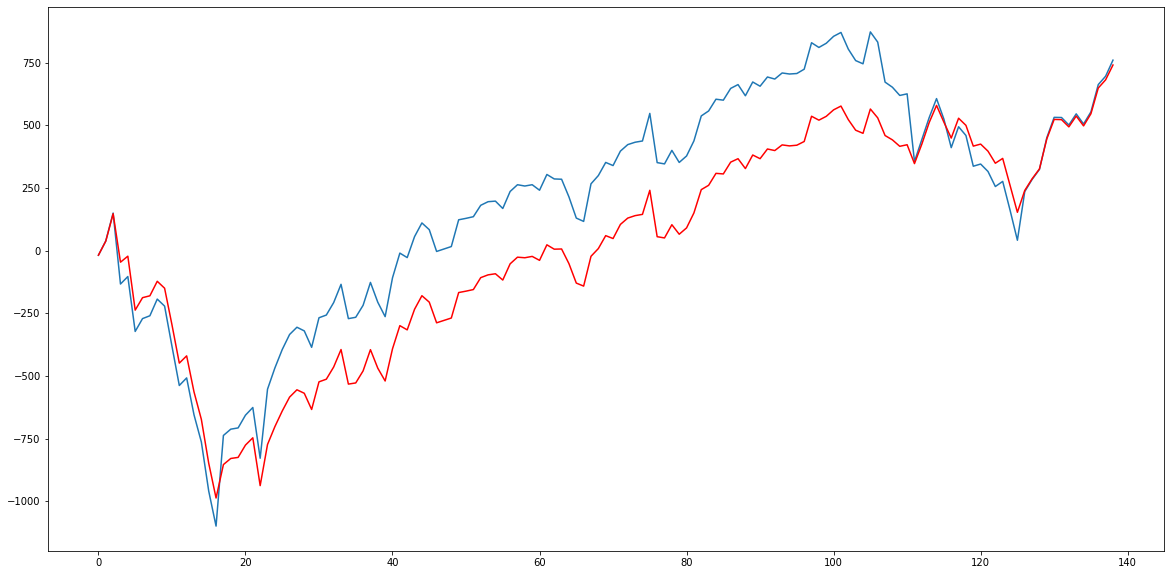

In [9]:
knn_ar.fit({"k_neighbors":19,"weights":'distance',"p":1})

plt.figure(figsize=(20, 10))
plt.plot(np.cumsum(knn_ar.data[knn_ar.prog:].values))
plt.plot(np.cumsum(knn_ar.predictions), c='r')

forecast_raw


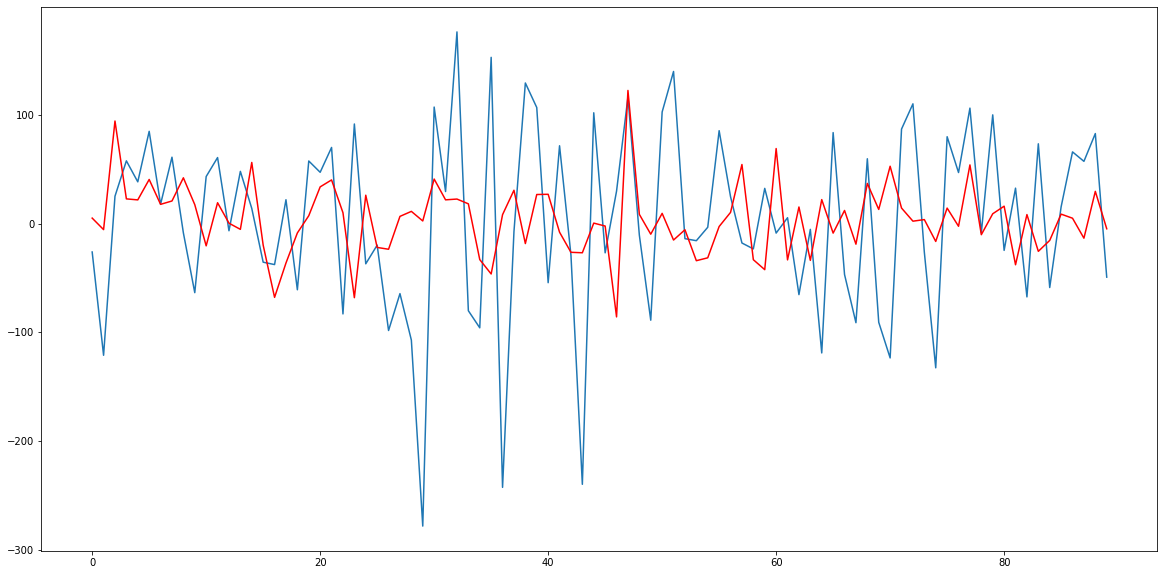

In [10]:
plt.figure(figsize=(20,10))
plt.plot(knn_ar.data_test.values)
plt.plot(knn_ar.forecast_raw(), c='r')

[  8.73560563   7.28497641   4.55107226   5.69400663   6.02086255
   6.47281042   8.77139483   8.28858134   9.29709694   7.39433257
   6.01506317   7.46088818   7.90898355   7.04788146   7.90916717
   8.13716203   6.63678099   5.78206798   6.82910641   5.32486882
   7.09517481   7.15012772   8.61380514   6.23061501   6.27457363
  10.45539234   9.52381019   9.35240006   6.44249067   3.62794145
 -16.37950706   1.64031378   1.67462214   5.67803037   3.12072708
  -3.64145993   5.56554211  12.84048177   1.06171498  -2.0354098
   1.5164515    4.17391332  -1.06539589   2.8565484    7.1905334
  -7.12657196   0.66061776  -3.13689424  -6.53072809   0.64286662
   4.49360698  -7.32668048  -5.60982744   1.81480322   1.78337072
   1.08045774  -3.03854482  -0.44354632   1.67288201   1.51788872
  -1.24996716   0.59903753   0.63310506   4.37697582   1.04889773
   3.73042121  -6.18682051   4.36371552   6.54149245  -3.73250674
   8.47934051   6.76643982  -4.36766104  -5.2359634    2.15176494
   9.0038523

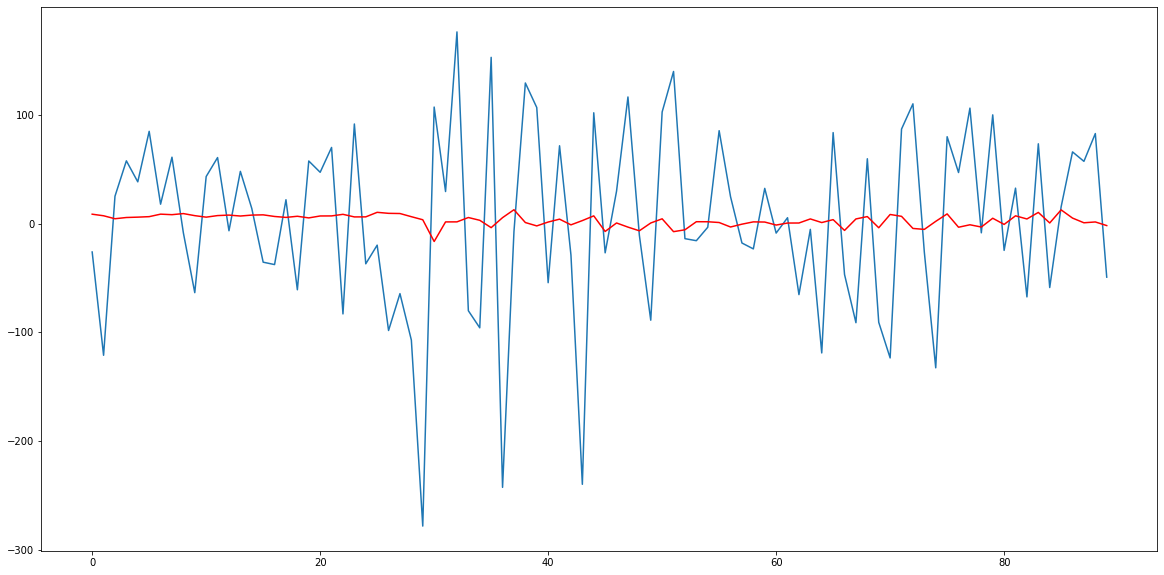

In [11]:
ar = AR_predict(data=ixic_vec_norm, p=1, test_ratio=.7, okno=1/3)
plt.figure(figsize=(20, 10))
plt.plot(ar.test.values)
plt.plot(ar.predict(), c='r')
print(ar.predictions)

In [12]:
def MSE(actual, preds):
    mse = (1 / len(preds)) * sum((actual - preds) ** 2)
    return mse

errors = pd.DataFrame(columns=["CART", "RF", "KNN", "AR"], index=["MSE"])
errors["CART"]["MSE"] = MSE(cart_ar.data_test, cart_ar.forecast_raw())
errors["RF"]["MSE"] = MSE(cart_ar.data_test, rf_ar.forecast_raw())
errors["KNN"]["MSE"] = MSE(cart_ar.data_test, knn_ar.forecast_raw())
errors["AR"]["MSE"] = MSE(ar.test, ar.predict())
errors

forecast_raw


ValueError: Unable to coerce to Series, length must be 1: given 89

In [ ]:
fitted_cart = cart_ar.predict()
fitted_rf = rf_ar.predict()
fitted_knn = knn_ar.predict()

In [ ]:
predictions = pd.DataFrame({"CART": fitted_cart, "RF": fitted_rf, "KNN": fitted_knn, "ACTUAL": cart_ar.data[cart_ar.prog:]})

forecasts = pd.DataFrame({"CART": cart_ar.forecast_raw(), "RF": rf_ar.forecast_raw(), "KNN": knn_ar.forecast_raw(), "ACTUAL": knn_ar.data_test, "AR": ar.predictions})

#optimum = pd.DataFrame({"CART": opt, "RF": opt_rf, "KNN": opt_knn})

In [ ]:
optimum.to_excel("OPTIMUM.xlsx")
predictions.to_excel("PREDICTIONS.xlsx")
forecasts.to_excel("FORECASTS.xlsx")
errors.to_excel("ERRORS.xlsx")

In [ ]:
plt.figure(figsize=(30, 15))
plt.plot(forecasts, label=forecasts.columns)
plt.legend()

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(ixic_vec_norm[1:], ixic_vec_norm.shift(1)[1:])